In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
data =  pd.read_csv('linear_regression_dataset.csv', header = 0)
data = data[["AGE", "FEMALE", "LOS", "RACE", "APRDRG", "TOTCHG"]]

In [3]:
print(data.to_string())

     AGE  FEMALE  LOS  RACE  APRDRG  TOTCHG
0     17       1    2   1.0     560    2660
1     17       0    2   1.0     753    1689
2     17       1    7   1.0     930   20060
3     17       1    1   1.0     758     736
4     17       1    1   1.0     754    1194
5     17       0    0   1.0     347    3305
6     17       1    4   1.0     754    2205
7     16       1    2   1.0     754    1167
8     16       1    1   1.0     753     532
9     17       1    2   1.0     758    1363
10    17       1    2   1.0     758    1245
11    15       0    2   1.0     753    1656
12    15       1    2   1.0     751    1379
13    15       1    4   1.0     758    2346
14    15       1    7   1.0     753    4006
15    15       1    4   1.0     758    2181
16    14       1    1   1.0     754     628
17    14       1    4   1.0     758    2463
18    15       1    3   1.0     753    1956
19    14       1    3   1.0     758    1802
20    13       1    1   1.0     812    3188
21    17       1    2   1.0     

In [4]:
data = data.dropna() #drop rows with atleast one null value


<AxesSubplot:>

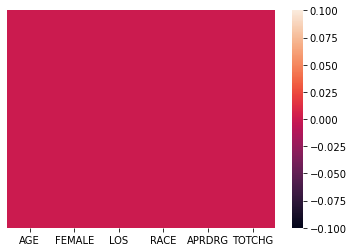

In [5]:
sns.heatmap(data.isnull(), yticklabels=False)

In [6]:
X=data.drop("TOTCHG", axis=1)
y=data["TOTCHG"]

In [7]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)) #normalize the data
X.head(5)

,AGE,FEMALE,LOS,RACE,APRDRG
0,1.0,1.0,0.048780,0.0,0.578947
1,1.0,0.0,0.048780,0.0,0.786251
2,1.0,1.0,0.170732,0.0,0.976369
3,1.0,1.0,0.024390,0.0,0.791622
4,1.0,1.0,0.024390,0.0,0.787325


In [8]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.013333333333333334


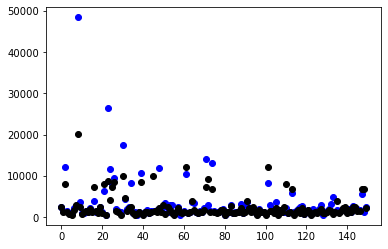

In [12]:
plt.figure()
plt.scatter(x=list(range(0, len(y_test))),y= y_test, color='blue')  #actual value
plt.scatter(x=list(range(0, len(y_test))),y= y_pred, color='black')  #predicted value
plt.show()